# States
# Nodes
# Edges
# Graph (build & invoke)

In [1]:
from dotenv import load_dotenv
from langchain_ollama import ChatOllama
%%capture --no-stderr
%pip install --quiet -U langgraph

# <img src="2024-11-07-17-45-33.png" width="50%"/>

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langgraph.graph import StateGraph, START, END

# State

State as a simple data structure that we update as we execute the graph.

In [4]:
from typing_extensions import TypedDict


class State(TypedDict):
    graph_state: str
    question: str
    number_of_question: int

In [5]:
from typing import Literal
import random
from ollama import chat


def conditional_node(state) -> Literal["node_bill_gates", "node_normal"]:
    print("Passing by conditional")
    print("State", state)
    user_input = state["question"]
    if state["question"] == "Who is Bill Gates?":
        print("You ask about Bill Gates in conditional")
        return "node_bill_gates"
    else:
        print()
        return "node_normal"

def node_normal(state):
    print("State", state)
    print("Passing by normal")
    response = chat(model='gemma2:2b', messages=[
            {
                'role': 'user',
                'content': state["question"],
            },
        ])
    state["question"] = response['message']['content']
    return state

def node_bill_gates(state):
    print("You ask about Bill Gates")
    print("State", state)
    response = chat(model='gemma2:2b', messages=[
            {
                'role': 'user',
                'content': state["question"],
            },
        ])
    state["question"] = response['message']['content']
    return state

def node_start(state):
    print("State", state)
    print("Passing by node 1")
    state["question"] = state["question"]
    print("Question: ", state["question"])
    return state

def node_end(state):
    print("Passing by node 44")
    print("State", state)
    state["graph_state"] = "Lucas giving a presentation"
    state["question"] = "It was a beautiful question!"
    state["number_of_question"] = state["number_of_question"]
    return state

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)

builder.add_node("node_normal", node_normal)
builder.add_node("node_bill_gates", node_bill_gates)
builder.add_node("node_start", node_start)

builder.add_edge(START, "node_start")
builder.add_conditional_edges("node_start", conditional_node)
builder.add_edge("node_normal", END)
builder.add_edge("node_bill_gates", END)

graph = builder.compile()

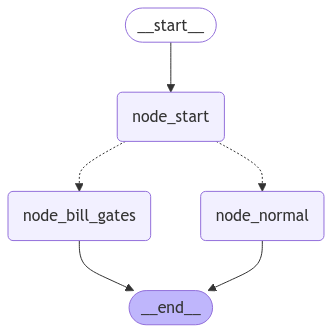

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({"question": "Who is Bill Gates?","number_of_question": "1"})

State {'question': 'Who is Bill Gates?', 'number_of_question': '1'}
Passing by node 1
Question:  Who is Bill Gates?
Passing by conditional
State {'question': 'Who is Bill Gates?', 'number_of_question': '1'}
You ask about Bill Gates in conditional
You ask about Bill Gates
State {'question': 'Who is Bill Gates?', 'number_of_question': '1'}


{'question': 'Bill Gates is a highly influential figure in the world of technology and philanthropy. Here\'s a summary:\n\n**He\'s best known for:**\n\n* **Co-founding Microsoft:**  Gates co-created Microsoft, one of the most successful software companies in history, revolutionizing personal computing and shaping how we interact with computers.\n* **Tech Pioneer:** He played a major role in developing the personal computer industry, ushering in an era of widespread digital access and innovation. \n* **Business Mogul & Investor:** Gates is recognized as one of the richest people in the world, thanks to his stake in Microsoft\'s success.  He also actively invests in various startups and ventures.\n\n**Beyond technology:**\n\n* **Philanthropist:** Gates established the Bill & Melinda Gates Foundation with his then-wife Melinda French Gates, where they focus on global health, poverty alleviation, and education initiatives. This foundation is one of the world\'s largest philanthropic organi

In [20]:
from typing import Literal
import random


def node1(state):
    print("Passing by node 1")
    state["graph_state"] = "node 1"
    return state


def node2(state):
    print("Passing by node 2")
    state["graph_state"] = "node 2"
    return state


def node3(state):
    print("Passing by node 3")
    state["graph_state"] = "node 3"
    return state


# Implementing some conditional logic
def decision_node(state) -> Literal["node2", "node3"]:
    user_input = state["graph_state"]

    if random.random() > 0.5:
        return "node2"
    else:
        return "node3"

In [21]:
builder = StateGraph(State)

builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decision_node)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

graph = builder.compile()

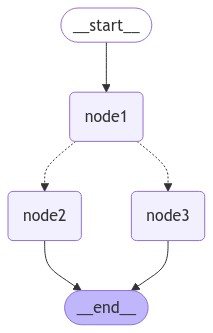

In [22]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
graph.invoke({"graph_state": ""})

Passing by node 1
Passing by node 3


{'graph_state': 'node 3'}

In [25]:
import matplotlib.pyplot as plt

Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 2
Passing by node 1
Passing by node 3
Passing by node 1
Passing by node 3
Passing by node 1
Passing by

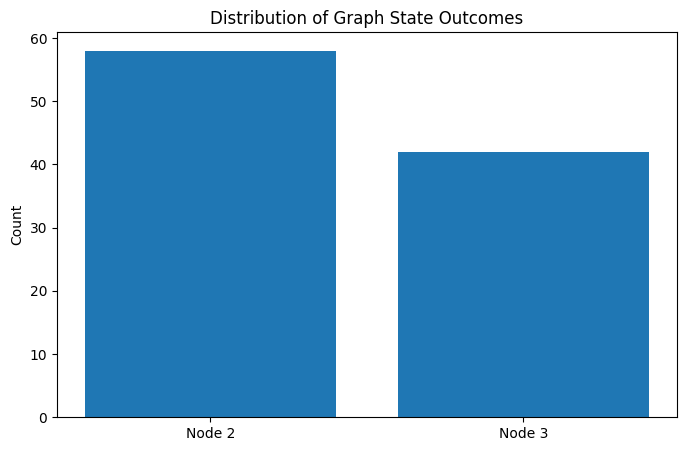

Node 2 occurred 58 times
Node 3 occurred 42 times


In [26]:
# Run multiple times to collect statistics
results = []
for _ in range(100):
    output = graph.invoke({"graph_state": ""})
    results.append(output["graph_state"])

# Count occurrences
node2_count = results.count("node 2")
node3_count = results.count("node 3")

# Create bar chart


plt.figure(figsize=(8, 5))
plt.bar(['Node 2', 'Node 3'], [node2_count, node3_count])
plt.title('Distribution of Graph State Outcomes')
plt.ylabel('Count')
plt.show()

print(f"Node 2 occurred {node2_count} times")
print(f"Node 3 occurred {node3_count} times")
